In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Install all the Python Packages

In [ ]:
!pip install fastai==2.7.12

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import Python Packages

In [ ]:
#importing the required packages
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.vision.all import *

**Path to Dataset directory**

In [ ]:
#testing
path = Path('/content/drive/MyDrive/CriketPose/faastaidataset/data')

**Data augmentation :**
In the below step dividing the dataset on 80-20% fashion named as valid_pct, using get_transforms function to resize all the images to 224 dimension.

In [ ]:
data = ImageDataLoaders.from_folder(path, train='.', valid_pct=0.2, seed=66,
                                    item_tfms=RandomResizedCrop(224, min_scale=0.5),
                                    batch_tfms=[*aug_transforms(), Normalize.from_stats(*imagenet_stats)])

In [ ]:
data

In [1]:
data.show_batch(figsize=(10,10))

**Total Count of Train and validation dataset**

The total number which is displayed below are the total count of train and validation dataset

In [ ]:
import torch
print(torch.__version__)

2.0.0+cu118


In [ ]:
import torchvision
print(torchvision.__version__)

0.15.1+cu118


In [ ]:
import fastai
print(fastai.__version__)

2.7.12


In [ ]:
#print(data.classes)
print(len(data.train_ds))
print(len(data.valid_ds))

3287
821


### Model Training

**Vgg16 deep learning algorithm implementation**

Description : VGG16 is a convolutional neural network model proposed by K. ... Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”.

Load the pre-trained weights of vgg16 model to train our model
below step we are loading the vgg16 model for training the data

For training this image dataset a pre-trained CNN model is used. This approach is known as transfer learning. Jeremy recommends using pre-trained models for faster training and better accuracy. This is especially applicable to computer vision problems

**CNN Algorithm 01- Vgg16 **

In [ ]:
#keras 
learn = cnn_learner(data, models.vgg16_bn,metrics=[accuracy, error_rate])


/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313

**Training process**
The cycle is training the model through one complete cycle traversing through complete Convolutional Neural Network layers
1. epoch is total number of cycles







In [ ]:
#using vgg19 algorithm/Model
learn.fit_one_cycle(2,3e-3)


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.905672,0.233310,0.917174,0.082826,07:24
1,0.443251,0.140299,0.948843,0.051157,00:50


**CNN Algorithm 02 : Resnet50 **

In [ ]:
learn = cnn_learner(data, models.resnet50,metrics=[accuracy, error_rate])

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61

In [ ]:
learn.fit_one_cycle(3,3e-3)


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.782129,0.363086,0.901340,0.098660,00:46
1,0.346847,0.098172,0.963459,0.036541,00:46
2,0.179356,0.060114,0.975639,0.024361,00:44


### Model Validation using Confusion Matrix

Plot Confusion matrix

Model performance can be validated in different ways. One of the popular methods is using the confusion matrix. Diagonal values of the matrix indicate correct predictions for each class, whereas other cell values indicate a number of wrong predictions.

Confusion matrix for vgg16

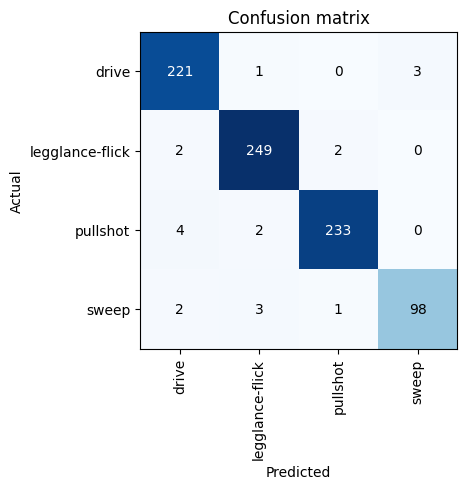

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
#losses,idxs = interp.top_losses()
#len(dls.valid_ds)==len(losses)==len(idxs)
interp.plot_confusion_matrix()

### Save Trained Model

**Saving/exporting the trained model as export.pkl**

Once you have trained the model and satisfied with the outcome, its time to deploy the model. For deploying the model into production you need to save your model architecture and the parameters it’s trained on. For this, the export method is used. The exported model is saved as a PKL file, which is a file created by pickle (a Python module).

In [ ]:
learn.export() #export file export.pkl 

**Testing phase **
Opening an image

### Load Trained Model

**Load The Trained model named export.pkl for testing**

Load the model which have been exported named export.pkl
export.pkl is like mathematical equation the model is trained already no need to train again and again just feed input it will give you an output

### Model Testing

**Prediction phase**

In this Phase above input image will be read and feed to a trained model which will predict the index value or the 6 class prediction

In [ ]:
from fastai.vision.all import *

# Set path to the saved model
model_path = '/content/drive/MyDrive/CriketPose/faastaidataset/data/export.pkl'

# Load the saved model
learn = load_learner(model_path)

# Load an image using PIL and create a PIL image object
img_path = '/content/drive/MyDrive/CriketPose/faastaidataset/data/drive/drives1.png'
pil_image = PILImage.create(img_path)

# Check the number of channels in the image
print(pil_image.shape)

# Make a prediction on the image
pred_class, pred_idx, outputs = learn.predict(pil_image)

# Print the predicted class and probability
print('Predicted class:', pred_class)
print('Predicted probability:', outputs[pred_idx])





(192, 262)


Predicted class: drive
Predicted probability: tensor(1.0000)


In [ ]:
############################################